In [1]:
import torch
import torchvision.transforms as T
import os
from PIL import Image
from torch import nn
import torch
from torch.utils.data import Dataset
from tqdm import tqdm
import numpy as np

In [2]:
pathh = "/home/demir/Desktop/BitirmeProjesi/getData/data/"

In [3]:
class FolderDataset(Dataset):
    """
    Creates a PyTorch dataset from folder, returning two tensor images.
    Args: 
    main_dir : directory where images are stored.
    transform (optional) : torchvision transforms to be applied while making dataset
    """

    def __init__(self, main_dir, transform=None):
        self.main_dir = main_dir
        self.transform = transform
        self.all_imgs = os.listdir(main_dir)

    def __len__(self):
        return len(self.all_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.all_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        image = image.resize((768, 768))

        if self.transform is not None:
            tensor_image = self.transform(image)

        return tensor_image, tensor_image

In [4]:
class ConvEncoder(nn.Module):
    """
    A simple Convolutional Encoder Model
    """

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, (3, 3), padding=(1, 1))
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d((2, 2))

        self.conv2 = nn.Conv2d(16, 32, (3, 3), padding=(1, 1))
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d((2, 2))

        self.conv3 = nn.Conv2d(32, 64, (3, 3), padding=(1, 1))
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d((2, 2))

        self.conv4 = nn.Conv2d(64, 128, (3, 3), padding=(1, 1))
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d((2, 2))

        self.conv5 = nn.Conv2d(128, 256, (3, 3), padding=(1, 1))
        self.relu5 = nn.ReLU(inplace=True)
        self.maxpool5 = nn.MaxPool2d((2, 2))
        
        self.conv6 = nn.Conv2d(256, 512, (3, 3), padding=(1, 1))
        self.relu6 = nn.ReLU(inplace=True)
        self.maxpool6 = nn.MaxPool2d((2, 2))
        
        self.conv7 = nn.Conv2d(512, 1024, (3, 3), padding=(1, 1))
        self.relu7 = nn.ReLU(inplace=True)
        self.maxpool7 = nn.MaxPool2d((2, 2))
        
        self.conv8 = nn.Conv2d(1024, 1024, (3, 3), padding=(1, 1))
        self.relu8 = nn.ReLU(inplace=True)
        self.maxpool8 = nn.MaxPool2d((2, 2))

    def forward(self, x):
        # Downscale the image with conv maxpool etc.
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)

        x = self.conv4(x)
        x = self.relu4(x)
        x = self.maxpool4(x)

        x = self.conv5(x)
        x = self.relu5(x)
        x = self.maxpool5(x)
        
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.maxpool6(x)
        
        x = self.conv7(x)
        x = self.relu7(x)
        x = self.maxpool7(x)
        
        x = self.conv8(x)
        x = self.relu8(x)
        x = self.maxpool8(x)
        
        return x



In [5]:
class ConvDecoder(nn.Module):
    """
    A simple Convolutional Decoder Model
    """

    def __init__(self):
        super().__init__()
        self.deconv1 = nn.ConvTranspose2d(1024, 1024, (2, 2), stride=(2, 2))
        self.relu1 = nn.ReLU(inplace=True)

        self.deconv2 = nn.ConvTranspose2d(1024, 512, (2, 2), stride=(2, 2))
        self.relu2 = nn.ReLU(inplace=True)

        self.deconv3 = nn.ConvTranspose2d(512, 256, (2, 2), stride=(2, 2))
        self.relu3 = nn.ReLU(inplace=True)

        self.deconv4 = nn.ConvTranspose2d(256, 128, (2, 2), stride=(2, 2))
        self.relu4 = nn.ReLU(inplace=True)
        
        self.deconv5 = nn.ConvTranspose2d(128, 64, (2, 2), stride=(2, 2))
        self.relu5 = nn.ReLU(inplace=True)
        
        self.deconv6 = nn.ConvTranspose2d(64, 32, (2, 2), stride=(2, 2))
        self.relu6 = nn.ReLU(inplace=True)
        
        self.deconv7 = nn.ConvTranspose2d(32, 16, (2, 2), stride=(2, 2))
        self.relu7 = nn.ReLU(inplace=True)

        self.deconv8 = nn.ConvTranspose2d(16, 3, (2, 2), stride=(2, 2))
        self.relu8 = nn.ReLU(inplace=True)

    def forward(self, x):
         # Upscale the image with convtranspose etc.
        x = self.deconv1(x)
        x = self.relu1(x)

        x = self.deconv2(x)
        x = self.relu2(x)

        x = self.deconv3(x)
        x = self.relu3(x)

        x = self.deconv4(x)
        x = self.relu4(x)

        x = self.deconv5(x)
        x = self.relu5(x)
        
        x = self.deconv6(x)
        x = self.relu6(x)
        
        x = self.deconv7(x)
        x = self.relu7(x)
        
        x = self.deconv8(x)
        x = self.relu8(x)
        return x


In [6]:
def train_step(encoder, decoder, train_loader, loss_fn, optimizer, device):
    """
    Performs a single training step
    Args:
    encoder: A convolutional Encoder. E.g. torch_model ConvEncoder
    decoder: A convolutional Decoder. E.g. torch_model ConvDecoder
    train_loader: PyTorch dataloader, containing (images, images).
    loss_fn: PyTorch loss_fn, computes loss between 2 images.
    optimizer: PyTorch optimizer.
    device: "cuda" or "cpu"
    Returns: Train Loss
    """
    #  Set networks to train mode.
    encoder.train()
    decoder.train()

    for batch_idx, (train_img, target_img) in enumerate(train_loader):
        # Move images to device
        train_img = train_img.to(device)
        target_img = target_img.to(device)
        
        # Zero grad the optimizer
        optimizer.zero_grad()
        # Feed the train images to encoder
        enc_output = encoder(train_img)
        # The output of encoder is input to decoder !
        dec_output = decoder(enc_output)
        
        # Decoder output is reconstructed image
        # Compute loss with it and orginal image which is target image.
        loss = loss_fn(dec_output, target_img)
        # Backpropogate
        loss.backward()
        # Apply the optimizer to network by calling step.
        optimizer.step()
    # Return the loss
    return loss.item()

def val_step(encoder, decoder, val_loader, loss_fn, device):
    """
    Performs a single training step
    Args:
    encoder: A convolutional Encoder. E.g. torch_model ConvEncoder
    decoder: A convolutional Decoder. E.g. torch_model ConvDecoder
    val_loader: PyTorch dataloader, containing (images, images).
    loss_fn: PyTorch loss_fn, computes loss between 2 images.
    device: "cuda" or "cpu"
    Returns: Validation Loss
    """
    
    # Set to eval mode.
    encoder.eval()
    decoder.eval()
    
    # We don't need to compute gradients while validating.
    with torch.no_grad():
        for batch_idx, (train_img, target_img) in enumerate(val_loader):
            # Move to device
            train_img = train_img.to(device)
            target_img = target_img.to(device)

            # Again as train. Feed encoder the train image.
            enc_output = encoder(train_img)
            # Decoder takes encoder output and reconstructs the image.
            dec_output = decoder(enc_output)

            # Validation loss for encoder and decoder.
            loss = loss_fn(dec_output, target_img)
    # Return the loss
    return loss.item()

def create_embedding(encoder, full_loader, embedding_dim, device):
    """
    Creates embedding using encoder from dataloader.
    encoder: A convolutional Encoder. E.g. torch_model ConvEncoder
    full_loader: PyTorch dataloader, containing (images, images) over entire dataset.
    embedding_dim: Tuple (c, h, w) Dimension of embedding = output of encoder dimesntions.
    device: "cuda" or "cpu"
    Returns: Embedding of size (num_images_in_loader + 1, c, h, w)
    """
    # Set encoder to eval mode.
    encoder.eval()
    # Just a place holder for our 0th image embedding.
    embedding = torch.randn(embedding_dim)
    
    # Again we do not compute loss here so. No gradients.
    with torch.no_grad():
        for batch_idx, (train_img, target_img) in enumerate(full_loader):
            # We can compute this on GPU. be faster
            train_img = train_img.to(device)
            
            # Get encoder outputs and move outputs to cpu
            enc_output = encoder(train_img).cpu()
            # Keep adding these outputs to embeddings.
            embedding = torch.cat((embedding, enc_output), 0)
    
    # Return the embeddings
    return embedding

In [7]:
transforms = T.Compose([T.ToTensor()]) # Normalize the pixels and convert to tensor.

full_dataset = FolderDataset(pathh, transforms) # Create folder dataset.

train_set_size = int(len(full_dataset) * 0.9)
valid_set_size = len(full_dataset) - train_set_size


# Split data to train and test
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_set_size, valid_set_size]) 

# Create the train dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
 
# Create the validation dataloader
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)

# Create the full dataloader
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=32)

loss_fn = nn.MSELoss() # We use Mean squared loss which computes difference between two images.

encoder = ConvEncoder() # Our encoder model
decoder = ConvDecoder() # Our decoder model

device = "cuda"  # GPU device

# Shift models to GPU
encoder.to(device)
decoder.to(device)

# Both the enocder and decoder parameters
autoencoder_params = list(encoder.parameters()) + list(decoder.parameters())
optimizer = torch.optim.Adam(autoencoder_params, lr=1e-3) # Adam Optimizer

# Time to Train !!!
EPOCHS = 50

max_loss = 99

# Usual Training Loop
for epoch in tqdm(range(EPOCHS)):
        train_loss = train_step(encoder, decoder, train_loader, loss_fn, optimizer, device=device)
        
        print(f"Epochs = {epoch}, Training Loss : {train_loss}")
        
        val_loss = val_step(encoder, decoder, val_loader, loss_fn, device=device)
        
        print(f"Epochs = {epoch}, Validation Loss : {val_loss}")

        # Simple Best Model saving
        if val_loss < max_loss:
            print("Validation Loss decreased, saving new best model")
            torch.save(encoder.state_dict(), "encoder_model.pt")
            torch.save(decoder.state_dict(), "decoder_model.pt")
            
            max_loss = val_loss


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [8]:
# Save the feature representations.
EMBEDDING_SHAPE = (1, 256, 25, 25) # This we know from our encoder

# We need feature representations for complete dataset not just train and validation.
# Hence we use full loader here.
embedding = create_embedding(encoder, full_loader, EMBEDDING_SHAPE, device)

# Convert embedding to numpy and save them
numpy_embedding = embedding.cpu().detach().numpy()
num_images = numpy_embedding.shape[0]

# Save the embeddings for complete dataset, not just train
flattened_embedding = numpy_embedding.reshape((num_images, -1))
np.save("data_embedding.npy", flattened_embedding)

NameError: name 'encoder' is not defined

## Test

In [10]:

from sklearn.neighbors import NearestNeighbors


device = "cpu"  # GPU device
encoder = ConvEncoder()

# Shift models to GPU
encoder.to(device)

encoder.load_state_dict(torch.load("/home/demir/Desktop/BitirmeProjesi/modelAI/old/encoder_model.pt",map_location=torch.device('cpu')))
encoder.eval()

def compute_similar_images(image, num_images, embedding, device):
    """
    Given an image and number of similar images to search.
    Returns the num_images closest neares images.
    Args:
    image: Image whose similar images are to be found.
    num_images: Number of similar images to find.
    embedding : A (num_images, embedding_dim) Embedding of images learnt from auto-encoder.
    device : "cuda" or "cpu" device.
    """
    
    image = Image.open(image).convert("RGB")
    image = image.resize((768, 768))
    
    image_tensor = T.ToTensor()(image)
    image_tensor = image_tensor.unsqueeze(0)
    
    with torch.no_grad():
        image_embedding = encoder(image_tensor).cpu().detach().numpy()
        
    flattened_embedding = image_embedding.reshape((image_embedding.shape[0], -1))

    knn = NearestNeighbors(n_neighbors=num_images, metric="cosine")
    knn.fit(embedding)

    a, indices = knn.kneighbors(flattened_embedding)
    indices_list = indices.tolist()
    return indices_list

device="cpu"
flattened_embedding = np.load("/home/demir/Desktop/BitirmeProjesi/modelAI/old/data_embedding.npy")


imgList = compute_similar_images("/home/demir/Desktop/BitirmeProjesi/getData/data/13542.png",10,flattened_embedding, device)

imgList

[[4207, 7023, 5049, 3442, 717, 4849, 4024, 6426, 7127, 5041]]

In [12]:
a = os.listdir(pathh)

In [13]:
from matplotlib import pyplot as plt
transforms = T.Compose([T.ToTensor()]) # Normalize the pixels and convert to tensor.
full_dataset = FolderDataset(pathh, transforms) # Create folder dataset.

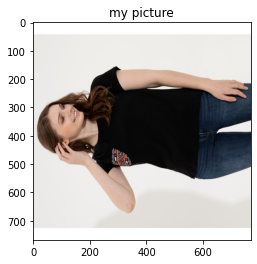

In [15]:
img = full_dataset[7023-1][0]
plt.imshow(np.transpose(img))
plt.title('my picture')
plt.show()

In [61]:
all_imgs[622-1]

'622.png'

In [16]:
transforms = T.Compose([T.ToTensor()]) # Normalize the pixels and convert to tensor.

full_dataset = FolderDataset(pathh, transforms) # Create folder dataset.

full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=32, num_workers=2)


encoder = ConvEncoder() # Our encoder model


device = "cpu"  # GPU device

# Shift models to GPU
encoder.to(device)

# Save the feature representations.
EMBEDDING_SHAPE = (1, 2048, 1, 1) # This we know from our encoder

# We need feature representations for complete dataset not just train and validation.
# Hence we use full loader here.
embedding = create_embedding(encoder, full_loader, EMBEDDING_SHAPE, device)

# Convert embedding to numpy and save them
numpy_embedding = embedding.cpu().detach().numpy()
num_images = numpy_embedding.shape[0]

# Save the embeddings for complete dataset, not just train
flattened_embedding = numpy_embedding.reshape((num_images, -1))
np.save("data_embedding.npy", flattened_embedding)